In [10]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [11]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [25]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [26]:
model = model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7636 - loss: 0.6903
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8557 - loss: 0.4049
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8711 - loss: 0.3621
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8811 - loss: 0.3363
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8853 - loss: 0.3201


In [33]:
history.history.keys()

In [34]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'])
plt.plot(result.history['loss'])

AttributeError: 'dict_keys' object has no attribute 'history'

In [35]:
result = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9291 - loss: 0.1976
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9339 - loss: 0.1970
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9338 - loss: 0.1963
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9364 - loss: 0.1895
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9359 - loss: 0.1858
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9368 - loss: 0.1815
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9365 - loss: 0.1795
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9372 - loss: 0.1818
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9375 - loss: 0.1783
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9429 - loss: 0.1726
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9420 - loss: 0.1697
Epoch 12/20
1407/1407 ━━━━━━━━

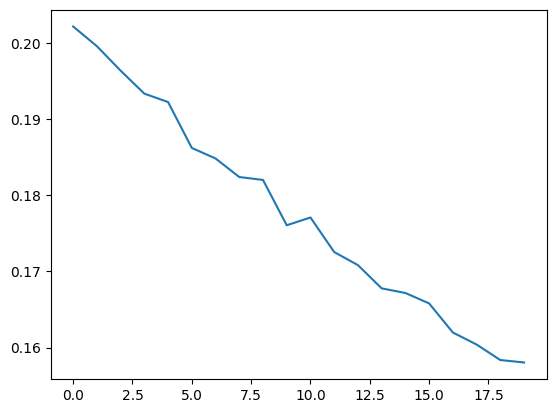

In [38]:
# plt.plot(result.history['accuracy'])
plt.plot(result.history['loss'])

In [39]:
# 검증 손실 => 과대적합/과소적합 파악
model = model_fn()
model.compile(
    loss=['sparse_categorical_crossentropy'],
    metrics=['accuracy']
)
result = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target) # 검증 데이터
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7596 - loss: 0.6925 - val_accuracy: 0.8387 - val_loss: 0.4588
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8529 - loss: 0.4116 - val_accuracy: 0.8613 - val_loss: 0.4034
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8669 - loss: 0.3680 - val_accuracy: 0.8713 - val_loss: 0.3640
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8769 - loss: 0.3430 - val_accuracy: 0.8753 - val_loss: 0.3511
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8866 - loss: 0.3215 - val_accuracy: 0.8825 - val_loss: 0.3377
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8865 - loss: 0.3107 - val_accuracy: 0.8807 - val_loss: 0.3385
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8929 - loss: 0.2983 - val_accuracy: 0.8653 - val_loss: 0.3921
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8992 - loss: 0.2819 

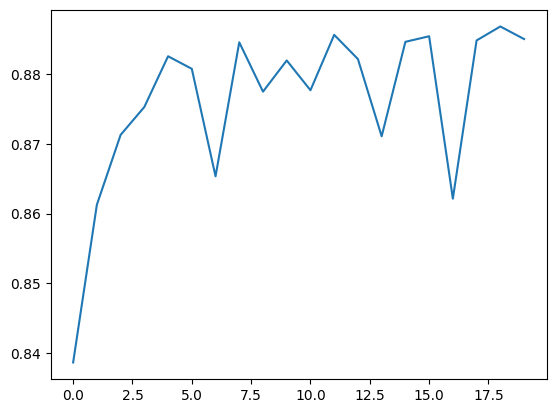

In [42]:
# plt.plot(result.history['val_loss'])
plt.plot(result.history['val_accuracy'])

In [43]:
#
model = model_fn()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
result = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7657 - loss: 0.6879 - val_accuracy: 0.8357 - val_loss: 0.4669
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8592 - loss: 0.4049 - val_accuracy: 0.8697 - val_loss: 0.3638
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8699 - loss: 0.3599 - val_accuracy: 0.8643 - val_loss: 0.3738
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8760 - loss: 0.3372 - val_accuracy: 0.8743 - val_loss: 0.3476
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8850 - loss: 0.3164 - val_accuracy: 0.8737 - val_loss: 0.3498
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8924 - loss: 0.2923 - val_accuracy: 0.8850 - val_loss: 0.3197
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8935 - loss: 0.2867 - val_accuracy: 0.8766 - val_loss: 0.3393
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8975 - loss: 0.2775 -

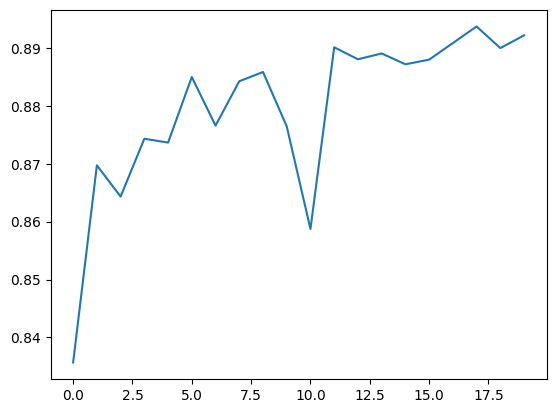

In [47]:
# plt.plot(result.history['val_loss'])
plt.plot(result.history['val_accuracy'])

In [52]:
# 드롭아웃
model = model_fn(keras.layers.Dropout(0.3)) # 30% 드롭아웃
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
result = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7287 - loss: 0.7698 - val_accuracy: 0.8475 - val_loss: 0.4181
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8368 - loss: 0.4513 - val_accuracy: 0.8568 - val_loss: 0.3879
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8526 - loss: 0.4020 - val_accuracy: 0.8707 - val_loss: 0.3577
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8567 - loss: 0.3860 - val_accuracy: 0.8656 - val_loss: 0.3622
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8675 - loss: 0.3655 - val_accuracy: 0.8747 - val_loss: 0.3460
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8701 - loss: 0.3578 - val_accuracy: 0.8799 - val_loss: 0.3328
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8736 - loss: 0.3404 - val_accuracy: 0.8780 - val_loss: 0.3333
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8771 - loss: 0.3333 -

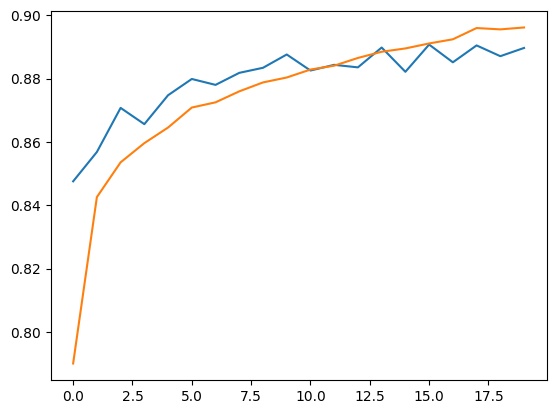

In [50]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])

In [55]:
# 모델 저장과 복원
model.save_weights('my_model.weights.h5') # 파라미터 값(가중치)들만 저장

In [56]:
model.save('my_model.keras')

In [61]:
# 콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cp = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    save_best_only=True # 가장 성능이 좋은 값만 저장, 가장 낮은 검증 손실을 만드는 모델 저장
)
es = keras.callbacks.EarlyStopping(patience=2) # 두번연속 검증 점수가 향상되지 않으면 훈련 중지(val_loss 기준)
result = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[cp, es]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7253 - loss: 0.7967 - val_accuracy: 0.8434 - val_loss: 0.4286
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8366 - loss: 0.4524 - val_accuracy: 0.8584 - val_loss: 0.3908
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8524 - loss: 0.4066 - val_accuracy: 0.8695 - val_loss: 0.3607
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8573 - loss: 0.3902 - val_accuracy: 0.8656 - val_loss: 0.3603
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8631 - loss: 0.3724 - val_accuracy: 0.8635 - val_loss: 0.3682
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8694 - loss: 0.3548 - val_accuracy: 0.8763 - val_loss: 0.3371
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8723 - loss: 0.3445 - val_accuracy: 0.8812 - val_loss: 0.3259
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8730 - loss: 0.3376 -

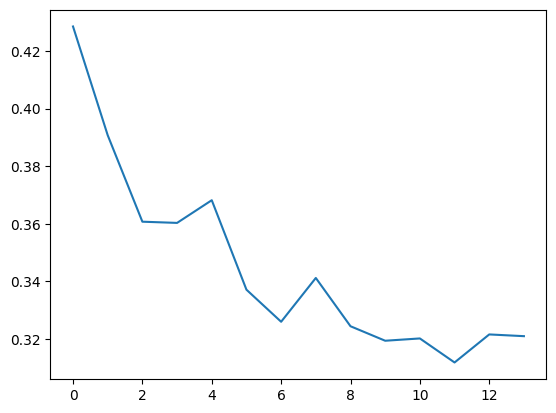

In [62]:
# plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])